import the following package

In [7]:
import pandas as pd

We will be using the BeautyData set as the source of data. So, load data set

In [8]:
df = pd.read_csv('BeautyData.csv')

In [11]:
df

,CourseEvals,BeautyScore,female,lower,nonenglish,tenuretrack
0,3.235245,0.201567,1,0,0,1
1,3.226328,-0.826081,0,0,0,1
2,3.647712,-0.660333,0,0,0,1
3,3.372062,-0.766312,1,0,0,1
4,4.292705,1.421445,1,0,0,1
...,...,...,...,...,...,...
458,4.438559,1.143045,0,1,0,1
459,4.860266,1.143045,0,0,0,1
460,4.154587,0.332051,1,0,1,1
461,3.111189,0.332051,1,0,1,1


Convert into arrays 

In [12]:
dataset = df.values

In [13]:
dataset

array([[ 3.23524468,  0.2015666 ,  1.        ,  0.        ,  0.        ,
         1.        ],
       [ 3.22632753, -0.8260813 ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 3.64771182, -0.6603327 ,  0.        ,  0.        ,  0.        ,
         1.        ],
       ...,
       [ 4.15458669,  0.3320507 ,  1.        ,  0.        ,  1.        ,
         1.        ],
       [ 3.1111892 ,  0.3320507 ,  1.        ,  0.        ,  1.        ,
         1.        ],
       [ 3.43402154,  0.3320507 ,  1.        ,  1.        ,  1.        ,
         1.        ]])

Split dataset into input features (X) and the feature we wish to predict (Y).

In [14]:
X = dataset[:, 0:5]

We assign the last column of our array to Y

In [15]:
Y = dataset[:, 5]

We first have to import the code that we want to use

In [16]:
from sklearn import preprocessing

We use a function called the min-max scaler, which scales the dataset so that all the input feature
lie between 0 to 1 inclusive

In [17]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

Our scaled dataset is stored in the array 'X_scale'.

In [18]:
X_scale

array([[0.42248171, 0.50881478, 1.        , 0.        , 0.        ],
       [0.41956357, 0.20837835, 0.        , 0.        , 0.        ],
       [0.55746208, 0.25683553, 0.        , 0.        , 0.        ],
       ...,
       [0.72333749, 0.54696226, 1.        , 0.        , 1.        ],
       [0.38188441, 0.54696226, 1.        , 0.        , 1.        ],
       [0.48753168, 0.54696226, 1.        , 1.        , 1.        ]])

Using of scikit-learn called 'train_test_split' 

In [19]:
from sklearn.model_selection import train_test_split

Then, split your dataset like this

In [29]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size = 0.3)

This tells scikit-learn that your val_and_test size will be 30% of the overall dataset

This function only helps us split our dataset into two. 

In [30]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size = 0.5)

In [31]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(324, 5) (69, 5) (70, 5) (324,) (69,) (70,)


Keras Neural Network for Linear Regression 

Import the necessary code from Keras

In [33]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


Build the Keras model

In [41]:
model = Sequential([
    Dense(32, activation = 'relu', input_shape = (5, )),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

The function model.compile

In [42]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Use the model.fit function to train the model with the training data set

In [43]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

W0926 22:58:57.499370 140591113238336 deprecation_wrapper.py:119] From /home/chi/anaconda3/envs/tfkerEnv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 324 samples, validate on 69 samples
Epoch 1/100
324/324 [==============================] - 3s 8ms/step - loss: 0.7324 - acc: 0.2377 - val_loss: 0.7108 - val_acc: 0.4203
Epoch 2/100
324/324 [==============================] - 0s 152us/step - loss: 0.7025 - acc: 0.4167 - val_loss: 0.6870 - val_acc: 0.5507
Epoch 3/100
324/324 [==============================] - 0s 102us/step - loss: 0.6752 - acc: 0.6512 - val_loss: 0.6664 - val_acc: 0.6667
Epoch 4/100
324/324 [==============================] - 0s 127us/step - loss: 0.6507 - acc: 0.7747 - val_loss: 0.6521 - val_acc: 0.6957
Epoch 5/100
324/324 [==============================] - 0s 111us/step - loss: 0.6329 - acc: 0.7963 - val_loss: 0.6384 - val_acc: 0.7246
Epoch 6/100
324/324 [==============================] - 0s 146us/step - loss: 0.6158 - acc: 0.7901 - val_loss: 0.6258 - val_acc: 0.7246
Epoch 7/100
324/324 [==============================] - 0s 149us/step - loss: 0.5996 - acc: 0.7901 - val_loss: 0.6156 - val_acc: 0.7246
Epoch 8/100


324/324 [==============================] - 0s 142us/step - loss: 0.5056 - acc: 0.7901 - val_loss: 0.5854 - val_acc: 0.7246
Epoch 62/100
324/324 [==============================] - 0s 101us/step - loss: 0.5053 - acc: 0.7901 - val_loss: 0.5859 - val_acc: 0.7246
Epoch 63/100
324/324 [==============================] - 0s 97us/step - loss: 0.5051 - acc: 0.7901 - val_loss: 0.5855 - val_acc: 0.7246
Epoch 64/100
324/324 [==============================] - 0s 90us/step - loss: 0.5047 - acc: 0.7901 - val_loss: 0.5845 - val_acc: 0.7246
Epoch 65/100
324/324 [==============================] - 0s 87us/step - loss: 0.5044 - acc: 0.7901 - val_loss: 0.5850 - val_acc: 0.7246
Epoch 66/100
324/324 [==============================] - 0s 112us/step - loss: 0.5041 - acc: 0.7901 - val_loss: 0.5839 - val_acc: 0.7246
Epoch 67/100
324/324 [==============================] - 0s 106us/step - loss: 0.5039 - acc: 0.7901 - val_loss: 0.5832 - val_acc: 0.7246
Epoch 68/100
324/324 [==============================] - 0s 103us

Evaluate it on the test set.

In [44]:
model.evaluate(X_test, Y_test)[1]

70/70 [==============================] - 0s 158us/step


0.7857142874172756

Visualizing Loss and Accuracy

The package matplotlib

In [45]:
import matplotlib.pyplot as plt

visualize the training loss and the validation loss

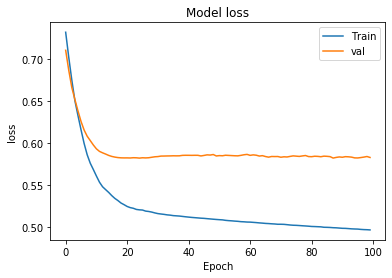

In [46]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc = 'upper right')
plt.show()

We can do the same to plot our training accuracy and validation accuracy

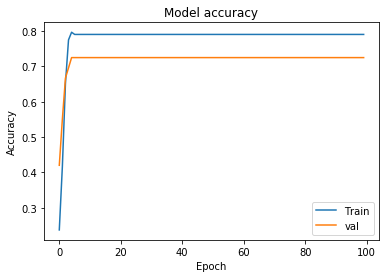

In [48]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'val'], loc = 'lower right')
plt.show()

Activation Regularization to our Neural Network

Introducing regularization to neural network. Then call Model 2

In [49]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(5,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
]) 




In [50]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Plot the loss graphs for hist_2

In [51]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 324 samples, validate on 69 samples
Epoch 1/100
324/324 [==============================] - 2s 6ms/step - loss: 0.6461 - acc: 0.7840 - val_loss: 0.6014 - val_acc: 0.7246
Epoch 2/100
324/324 [==============================] - 1s 3ms/step - loss: 0.5252 - acc: 0.7901 - val_loss: 0.6197 - val_acc: 0.7246
Epoch 3/100
324/324 [==============================] - 1s 3ms/step - loss: 0.4882 - acc: 0.7901 - val_loss: 0.5791 - val_acc: 0.7246
Epoch 4/100
324/324 [==============================] - 1s 3ms/step - loss: 0.4710 - acc: 0.7901 - val_loss: 0.5477 - val_acc: 0.7246
Epoch 5/100
324/324 [==============================] - 1s 3ms/step - loss: 0.4836 - acc: 0.7901 - val_loss: 0.5452 - val_acc: 0.7246
Epoch 6/100
324/324 [==============================] - 1s 3ms/step - loss: 0.4550 - acc: 0.7901 - val_loss: 0.6013 - val_acc: 0.7246
Epoch 7/100
324/324 [==============================] - 1s 3ms/step - loss: 0.4673 - acc: 0.7901 - val_loss: 0.5167 - val_acc: 0.7246
Epoch 8/100
324/324 [===

Epoch 62/100
324/324 [==============================] - 1s 3ms/step - loss: 0.3561 - acc: 0.8488 - val_loss: 0.4497 - val_acc: 0.7681
Epoch 63/100
324/324 [==============================] - 1s 3ms/step - loss: 0.3382 - acc: 0.8457 - val_loss: 0.4992 - val_acc: 0.7536
Epoch 64/100
324/324 [==============================] - 1s 3ms/step - loss: 0.3359 - acc: 0.8426 - val_loss: 0.5043 - val_acc: 0.7391
Epoch 65/100
324/324 [==============================] - 1s 3ms/step - loss: 0.3395 - acc: 0.8457 - val_loss: 0.5169 - val_acc: 0.7536
Epoch 66/100
324/324 [==============================] - 1s 3ms/step - loss: 0.3887 - acc: 0.8302 - val_loss: 0.5139 - val_acc: 0.7391
Epoch 67/100
324/324 [==============================] - 1s 3ms/step - loss: 0.3445 - acc: 0.8519 - val_loss: 0.4904 - val_acc: 0.7536
Epoch 68/100
324/324 [==============================] - 1s 3ms/step - loss: 0.3205 - acc: 0.8519 - val_loss: 0.4589 - val_acc: 0.7536
Epoch 69/100
324/324 [==============================] - 1s 3ms

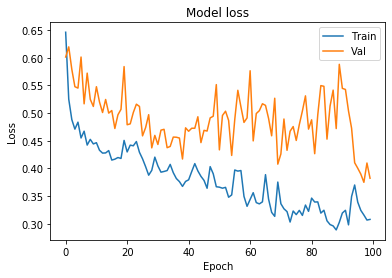

In [52]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

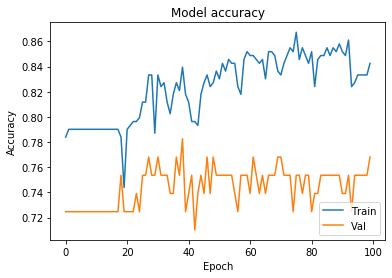

In [53]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

import L2 regularization and dropout:

In [54]:
from keras.layers import Dropout
from keras import regularizers

specify our third model like this

In [55]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(5,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

W0926 23:21:36.839733 140591113238336 deprecation.py:506] From /home/chi/anaconda3/envs/tfkerEnv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
Use model.compile

In [56]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 324 samples, validate on 69 samples
Epoch 1/100
324/324 [==============================] - 3s 9ms/step - loss: 24.8398 - acc: 0.7809 - val_loss: 17.1523 - val_acc: 0.7246
Epoch 2/100
324/324 [==============================] - 1s 4ms/step - loss: 13.0761 - acc: 0.7901 - val_loss: 8.5256 - val_acc: 0.7246
Epoch 3/100
324/324 [==============================] - 1s 3ms/step - loss: 6.3056 - acc: 0.7901 - val_loss: 4.0203 - val_acc: 0.7246
Epoch 4/100
324/324 [==============================] - 1s 4ms/step - loss: 2.9609 - acc: 0.7901 - val_loss: 1.9471 - val_acc: 0.7246
Epoch 5/100
324/324 [==============================] - 1s 3ms/step - loss: 1.4655 - acc: 0.7901 - val_loss: 1.1325 - val_acc: 0.7246
Epoch 6/100
324/324 [==============================] - 1s 3ms/step - loss: 0.8828 - acc: 0.7901 - val_loss: 0.8114 - val_acc: 0.7246
Epoch 7/100
324/324 [==============================] - 1s 4ms/step - loss: 0.6820 - acc: 0.7901 - val_loss: 0.7096 - val_acc: 0.7246
Epoch 8/100
324/324 [

Epoch 62/100
324/324 [==============================] - 1s 4ms/step - loss: 0.5207 - acc: 0.7901 - val_loss: 0.6033 - val_acc: 0.7246
Epoch 63/100
324/324 [==============================] - 1s 4ms/step - loss: 0.5186 - acc: 0.7901 - val_loss: 0.6107 - val_acc: 0.7246
Epoch 64/100
324/324 [==============================] - 1s 4ms/step - loss: 0.5245 - acc: 0.7901 - val_loss: 0.6100 - val_acc: 0.7246
Epoch 65/100
324/324 [==============================] - 1s 4ms/step - loss: 0.5196 - acc: 0.7901 - val_loss: 0.6017 - val_acc: 0.7246
Epoch 66/100
324/324 [==============================] - 1s 4ms/step - loss: 0.5207 - acc: 0.7901 - val_loss: 0.6038 - val_acc: 0.7246
Epoch 67/100
324/324 [==============================] - 1s 4ms/step - loss: 0.5210 - acc: 0.7901 - val_loss: 0.6137 - val_acc: 0.7246
Epoch 68/100
324/324 [==============================] - 1s 4ms/step - loss: 0.5254 - acc: 0.7901 - val_loss: 0.6129 - val_acc: 0.7246
Epoch 69/100
324/324 [==============================] - 1s 4ms

Plot the loss and accuracy graphs

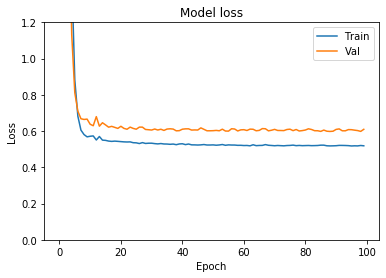

In [57]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

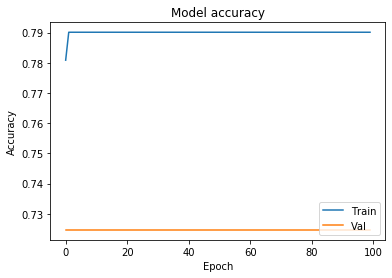

In [58]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()